## Observations and Insights 

#1: Two drugs, Capomulin and Ramicane, showed superior potential for reducing overall tumor burden in mice vs. other therapies included in analysis

#2: Among the main 4 treatment regimens, 1 outlier was detected in the lower bound of Infubinol, with a similar tumor burden to the averages produced by Capomuline and Ramicane, suggesting that this single mouse might have responded to Infubinol in the same way the bulk of mice tested responded to the two lead candidates, or that this sole mouse was simply a statistical abberation

#3: Linear regression analysis reveals tumor size is closely correlated to mouse weight, meaning that mouse weight over the study can be used as a surrogate measure to tumor size in future trials

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
pymaceuticals_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pymaceuticals_df.duplicated("Mouse ID")

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_df.drop_duplicates("Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [43]:
# Checking the number of mice in the clean DataFrame.
pymaceuticals_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_drug = pymaceuticals_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_drug = pymaceuticals_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_drug = pymaceuticals_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
stdev_drug = pymaceuticals_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
SEM_drug = pymaceuticals_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

Complete_Drug_Table = pd.DataFrame()
Complete_Drug_Table.assign(Mean=mean_drug,Median=median_drug,Variance=variance_drug,StdDev=stdev_drug,SEM=SEM_drug)

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
pymaceuticals_df.groupby("Drug Regimen").describe()["Tumor Volume (mm3)"]

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

Text(0, 0.5, '# Mice')

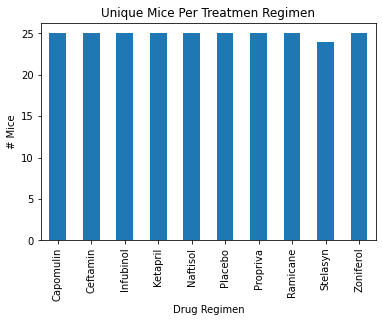

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
data_mouse_bar = pymaceuticals_df.groupby('Drug Regimen').nunique()["Mouse ID"]
mouse_bar = data_mouse_bar.plot.bar(rot='vertical', title = 'Unique Mice Per Treatmen Regimen')
mouse_bar.set_xlabel("Drug Regimen")
mouse_bar.set_ylabel("# Mice")

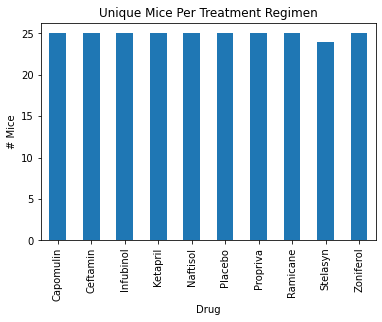

In [47]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.xdata = data_mouse_bar.plot.bar()
plt.xlabel('Drug')
plt.ylabel('# Mice')
plt.title('Unique Mice Per Treatment Regimen')
plt.show()

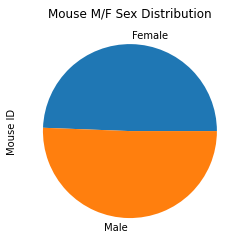

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_msex_pie = pymaceuticals_df.groupby('Sex').count()["Mouse ID"]
msex_pie = data_msex_pie.plot.pie(title = 'Mouse M/F Sex Distribution')

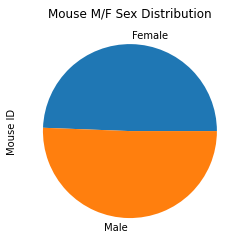

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(data_msex_pie,labels=data_msex_pie.index)
plt.title("Mouse M/F Sex Distribution")
plt.ylabel("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Capomulin
Capomulin_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Capomulin"), :]
Capomulin_maxtime = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_merged = pd.merge(Capomulin_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Capomulin_tumorburden = Capomulin_merged["Tumor Volume (mm3)"]
Capomulin_quartiles = Capomulin_tumorburden.quantile([.25,.5,.75])
Capomulin_upperQ = Capomulin_quartiles[0.75]                                            
Capomulin_lowerQ = Capomulin_quartiles[0.25]
Capomulin_IQR = (Capomulin_upperQ - Capomulin_lowerQ)
Capomulin_upperbound = Capomulin_upperQ + (1.5*Capomulin_IQR)
Capomulin_lowerbound = Capomulin_lowerQ - (1.5*Capomulin_IQR)

#Ramicane
Ramicane_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Ramicane"), :]
Ramicane_maxtime = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_merged = pd.merge(Ramicane_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Ramicane_tumorburden = Ramicane_merged["Tumor Volume (mm3)"]
Ramicane_quartiles = Ramicane_tumorburden.quantile([.25,.5,.75])
Ramicane_upperQ = Ramicane_quartiles[0.75]                                            
Ramicane_lowerQ = Ramicane_quartiles[0.25]
Ramicane_IQR = (Ramicane_upperQ - Ramicane_lowerQ)
Ramicane_upperbound = Ramicane_upperQ + (1.5*Ramicane_IQR)
Ramicane_lowerbound = Ramicane_lowerQ - (1.5*Ramicane_IQR)


#Infubinol
Infubinol_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Infubinol"), :]
Infubinol_maxtime = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_merged = pd.merge(Infubinol_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Infubinol_tumorburden = Infubinol_merged["Tumor Volume (mm3)"]
Infubinol_quartiles = Infubinol_tumorburden.quantile([.25,.5,.75])
Infubinol_upperQ = Infubinol_quartiles[0.75]                                            
Infubinol_lowerQ = Infubinol_quartiles[0.25]
Infubinol_IQR = (Infubinol_upperQ - Infubinol_lowerQ)
Infubinol_upperbound = Infubinol_upperQ + (1.5*Infubinol_IQR)
Infubinol_lowerbound = Infubinol_lowerQ - (1.5*Infubinol_IQR)


#Ceftamin
Ceftamin_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Ceftamin"), :]
Ceftamin_maxtime = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_merged = pd.merge(Ceftamin_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Ceftamin_tumorburden = Ceftamin_merged["Tumor Volume (mm3)"]
Ceftamin_quartiles = Ceftamin_tumorburden.quantile([.25,.5,.75])
Ceftamin_upperQ = Ceftamin_quartiles[0.75]                                            
Ceftamin_lowerQ = Ceftamin_quartiles[0.25]
Ceftamin_IQR = (Ceftamin_upperQ - Ceftamin_lowerQ)
Ceftamin_upperbound = Ceftamin_upperQ + (1.5*Ceftamin_IQR)
Ceftamin_lowerbound = Ceftamin_lowerQ - (1.5*Ceftamin_IQR) 

<ipython-input-51-0274a8ac502f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])


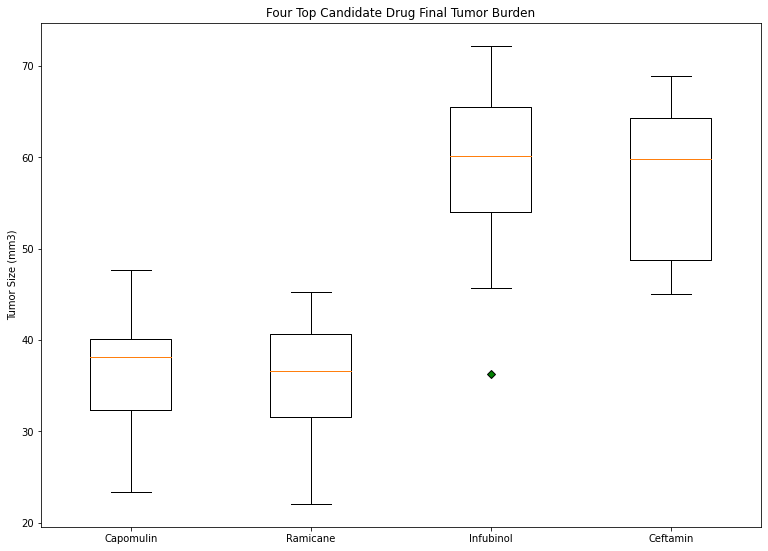

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bp_data = [Capomulin_tumorburden, Ramicane_tumorburden, Infubinol_tumorburden, Ceftamin_tumorburden]
fig = plt.figure(figsize = (10,7))
ax = fig.add_axes([0, 0, 1, 1])
green_diamond = dict(markerfacecolor='g', marker='D')

ax.set_title("Four Top Candidate Drug Final Tumor Burden")
ax.set_xticklabels(['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])
ax.set_ylabel("Tumor Size (mm3)")
bp = ax.boxplot(bp_data, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

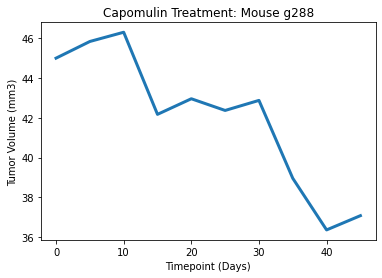

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_line = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g288",:]
timepoint = Capomulin_line["Timepoint"]
tumorburden = Capomulin_line["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment: Mouse g288")
plt.plot(timepoint,tumorburden,linewidth=3, markersize=11)
plt.xlabel("Timepoint (Days)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

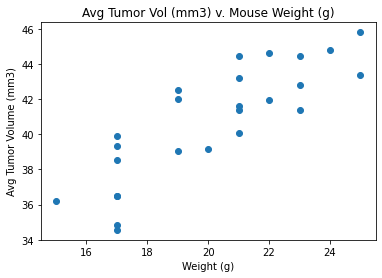

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df_avg = Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(Capomulin_df_avg["Weight (g)"], Capomulin_df_avg["Tumor Volume (mm3)"])
plt.title("Avg Tumor Vol (mm3) v. Mouse Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Text(0.5, 1.0, 'Avg Tumor Vol (mm3) v. Mouse Weight (g)')

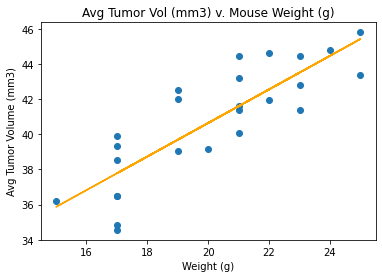

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
st.linregress(Capomulin_df_avg["Weight (g)"], Capomulin_df_avg["Tumor Volume (mm3)"])
slope = 0.9544396890241045
intercept = 21.552160532685015
linreg = (Capomulin_df_avg["Weight (g)"]*slope+intercept)
plt.scatter(Capomulin_df_avg["Weight (g)"], Capomulin_df_avg["Tumor Volume (mm3)"])
plt.plot(Capomulin_df_avg["Weight (g)"],linreg,color="orange")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Avg Tumor Vol (mm3) v. Mouse Weight (g)")